## Initialization

In [1]:
import unet, imageGeneration, benchmark

## Define image parameters function

In [2]:
def image_parameters_function(lower_limit_SNR, higher_limit_SNR, image_size = 256):
    from numpy.random import uniform, randint
    from numpy import ones
    from math import pi
    
    particle_number = randint(20, 30)
    particle_radius_list = uniform(0.5, 2, particle_number)
    (particle_center_x_list, particle_center_y_list) = imageGeneration.get_particle_positions(particle_radius_list, image_size)

    particle_bessel_orders_list = []
    particle_intensities_list = []

    for i in range(particle_number):
        particle_bessel_orders_list.append([1, ])
        particle_intensities_list.append([uniform(0.05, 0.13, 1), ])

    image_parameters = imageGeneration.get_image_parameters(
        particle_center_x_list=lambda: particle_center_x_list,
        particle_center_y_list=lambda: particle_center_y_list,
        particle_radius_list=lambda: particle_radius_list,
        particle_bessel_orders_list=lambda: particle_bessel_orders_list,
        particle_intensities_list=lambda: particle_intensities_list,
        image_size=lambda: image_size,
        image_background_level=lambda: uniform(.3, .5),
        signal_to_noise_ratio=lambda: uniform(lower_limit_SNR, higher_limit_SNR),
        gradient_intensity=lambda: uniform(0, 0),
        gradient_direction=lambda: uniform(-pi, pi),
        ellipsoidal_orientation=lambda: uniform(-pi, pi, particle_number),
        ellipticity=lambda: 1)

    return image_parameters

In [3]:
def plot_TPR_over_FPR_as_function_of_SNR(model, lower_SNR, higher_SNR):
    from matplotlib import pyplot as plt
    
    TPRoverFPR = []
    for SNR in range(lower_SNR, higher_SNR+1):
        (batch_images, batch_labels, batch_predictions) = imageGeneration.get_batch(batch_size = 10,
                                                                                    verbose = False,
                                                                                get_image_parameters_function = lambda:image_parameters_function(lower_limit_SNR = SNR,
                                                                                                                                                 higher_limit_SNR = SNR+1))
        batch_predictions = model.predict(batch_images)
        batch_predictions = imageGeneration.cutoff(batch_predictions, cutoff_value = 0.5, apply_sigmoid = True)
        P, N, TP, TN, FP, FN = benchmark.operating_characteristics(batch_labels, batch_predictions)
        TPRoverFPR.append((TP/P)/(FP/N))
    plt.plot(range(lower_SNR,higher_SNR+1), TPRoverFPR, label = 'Papiez')
    plt.ylim(0,500)
    plt.show()

In [4]:
def plot_ROC_curve_as_function_of_SNR(model, lower_SNR, higher_SNR):
    from matplotlib import pyplot as plt
    
    TPR = []
    FPR = []
    for SNR in range(lower_SNR, higher_SNR+1):
        (batch_images, batch_labels, batch_predictions) = imageGeneration.get_batch(batch_size = 10,
                                                                                    verbose = False,
                                                                                get_image_parameters_function = lambda:image_parameters_function(lower_limit_SNR = SNR,
                                                                                                                                                 higher_limit_SNR = SNR+1))
        batch_predictions = model.predict(batch_images)
        batch_predictions = imageGeneration.cutoff(batch_predictions, cutoff_value = 0.5, apply_sigmoid = True)
        P, N, TP, TN, FP, FN = benchmark.operating_characteristics(batch_labels, batch_predictions)
        TPR.append(TP/P)
        FPR.append(FP/N)
    plt.plot(FPR, TPR)
    plt.ylim(0,1)
    plt.xlim(0,0.2)
    plt.show()

## Benchmark models

Time taken for batch generation of size 10: 0.1297013759613037 s.


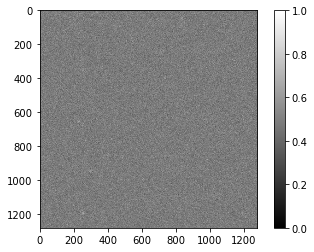

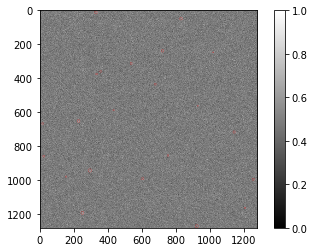

Filename is 2020-03-25\unet_particle.hdf5.
SNR is 10, optimal_cutoff is 1.08
P is 1460, N is 653900, TP is 0, TN is 653900, FP is 0, FN is 1460


c:\users\david tonderski\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in double_scalars


SNR is 11, optimal_cutoff is 1.07
P is 1408, N is 653952, TP is 0, TN is 653952, FP is 0, FN is 1408
SNR is 12, optimal_cutoff is 1.06
P is 1292, N is 654068, TP is 0, TN is 654068, FP is 0, FN is 1292
SNR is 13, optimal_cutoff is 1.00
P is 1375, N is 653985, TP is 0, TN is 653985, FP is 0, FN is 1375
SNR is 14, optimal_cutoff is 0.98
P is 1178, N is 654182, TP is 99, TN is 654093, FP is 89, FN is 1079
SNR is 15, optimal_cutoff is 0.99
P is 1439, N is 653921, TP is 9, TN is 653916, FP is 5, FN is 1430
SNR is 16, optimal_cutoff is 0.98
P is 1345, N is 654015, TP is 78, TN is 653974, FP is 41, FN is 1267
SNR is 17, optimal_cutoff is 0.99
P is 1177, N is 654183, TP is 50, TN is 654156, FP is 27, FN is 1127
SNR is 18, optimal_cutoff is 0.97
P is 1405, N is 653955, TP is 395, TN is 653721, FP is 234, FN is 1010
SNR is 19, optimal_cutoff is 0.96
P is 1388, N is 653972, TP is 526, TN is 653665, FP is 307, FN is 862
SNR is 20, optimal_cutoff is 0.96
P is 1264, N is 654096, TP is 573, TN is 653

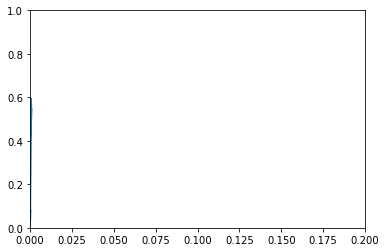

c:\users\david tonderski\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in true_divide


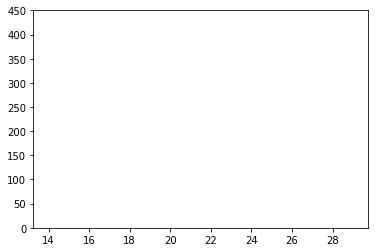

Filename is 2020-03-26_1\unet_particle.hdf5.
SNR is 10, optimal_cutoff is 1.08
P is 1331, N is 654029, TP is 0, TN is 654029, FP is 0, FN is 1331
SNR is 11, optimal_cutoff is 1.08
P is 1485, N is 653875, TP is 0, TN is 653875, FP is 0, FN is 1485
SNR is 12, optimal_cutoff is 1.08
P is 1367, N is 653993, TP is 0, TN is 653993, FP is 0, FN is 1367
SNR is 13, optimal_cutoff is 1.08
P is 1191, N is 654169, TP is 0, TN is 654169, FP is 0, FN is 1191
SNR is 14, optimal_cutoff is 1.08
P is 1384, N is 653976, TP is 0, TN is 653976, FP is 0, FN is 1384
SNR is 15, optimal_cutoff is 1.08
P is 1444, N is 653916, TP is 0, TN is 653916, FP is 0, FN is 1444
SNR is 16, optimal_cutoff is 1.08
P is 1305, N is 654055, TP is 0, TN is 654055, FP is 0, FN is 1305
SNR is 17, optimal_cutoff is 1.08
P is 1364, N is 653996, TP is 0, TN is 653996, FP is 0, FN is 1364
SNR is 18, optimal_cutoff is 1.08
P is 1355, N is 654005, TP is 0, TN is 654005, FP is 0, FN is 1355
SNR is 19, optimal_cutoff is 1.08
P is 1419, N

KeyboardInterrupt: 

In [8]:
import glob, os
from matplotlib import pyplot as plt
from scipy.ndimage import zoom
import numpy as np

lower_limit_SNR = 15
higher_limit_SNR = 16
(batch_images, batch_labels, batch_predictions) = imageGeneration.get_batch(batch_size = 10,
                                                                            get_image_parameters_function = lambda:image_parameters_function(lower_limit_SNR = lower_limit_SNR, 
                                                                                                                                             higher_limit_SNR = higher_limit_SNR))

model = unet.create_unet()

plt.imshow(zoom(batch_images[0,:,:,0],5.0), cmap = 'gray', vmin = 0, vmax = 1)
plt.colorbar()
plt.show()

imageGeneration.visualise_batch((batch_images, batch_labels, batch_predictions), use_predictions = False)
plt.show()

for filename in glob.iglob('C:\School\Årskurs 3\Kandidat\DeepTrack\DeepTrack 1.0\\NewNetwork' + '\*\*.hdf5', recursive=True):
    
    #Prints current filename
    filenameList = filename.split('\\')
    print("Filename is %s."% ('\\'.join(filenameList[len(filenameList)-2:len(filenameList)])))
    

    TPR = []
    FPR = []
    TPRoverFPR = []
    lower_SNR = 10
    upper_SNR = 30
    for SNR in range(lower_SNR, upper_SNR):
        model.load_weights(filename)
        #Generate batch for cutoff
        (batch_images, batch_labels, batch_predictions) = imageGeneration.get_batch(batch_size = 10,
                                                                                    get_image_parameters_function = lambda:image_parameters_function(lower_limit_SNR = SNR,
                                                                                                                                             higher_limit_SNR = SNR+1),
                                                                                    verbose = False)
        #Generate predictions for cutoff and find optimal cutoff for current SNR
        batch_predictions = model.predict(batch_images)
        optimal_cutoff = unet.get_optimal_cutoff(batch_labels, batch_predictions, sample_size = 10, apply_sigmoid = True)
        print("SNR is %d, optimal_cutoff is %.2f" % (SNR, optimal_cutoff))
        
        #Generate batch for benchmarking
        (batch_images, batch_labels, batch_predictions) = imageGeneration.get_batch(batch_size = 10,
                                                                                    get_image_parameters_function = lambda:image_parameters_function(lower_limit_SNR = SNR,
                                                                                                                                             higher_limit_SNR = SNR+1),
                                                                                    verbose = False)
        #Generate predictions for benchmarking
        batch_predictions = model.predict(batch_images)
        batch_predictions = imageGeneration.cutoff(batch_predictions, cutoff_value = optimal_cutoff, apply_sigmoid = True)

        #Get TPR and FPR
        P, N, TP, TN, FP, FN = benchmark.operating_characteristics(batch_labels, batch_predictions)
        print("P is %d, N is %d, TP is %d, TN is %d, FP is %d, FN is %d" % (P, N, TP, TN, FP, FN))

        TPR.append(TP/P)
        FPR.append(FP/N)
        TPRoverFPR.append((TP/P)/(FP/N))
        
    # Draw ROC curve for current model
    plt.plot(FPR,TPR)
    plt.ylim(0,1)
    plt.xlim(0,0.2)
    plt.show()
    
    # Draw TPR/FPR ratio as function of SNR for current model
    TPRoverFPR = np.asarray(TPR)/np.asarray(FPR)
    plt.plot(range(lower_SNR, upper_SNR), TPRoverFPR)
    plt.ylim(0,450)
    plt.show()
    

